In [59]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
mf = pd.read_csv('m_full.csv')

In [3]:
mf.head()

,id,city,country,month,name,series,state,year,date,cun,location_type,location_path,latitude,longitude
0,aachen_icon,Aachen,Germany,January,Aachen,icon,NaN,2009,2009-01-01,Aachen,city,"Aachen, Germany",50.776351,6.083862
1,aarhus_icon,Aarhus,Denmark,January,Aarhus,icon,NaN,2014,2014-01-01,Arhus,city,"Aarhus, Denmark",56.149628,10.213405
2,aberdeen_yah,Aberdeen,United Kingdom,August,Aberdeen,yah,Scotland,2017,2017-08-01,Aberdeen,city,"Aberdeen, Scotland, United Kingdom",57.148243,-2.092809
3,abu_dhabi_icon,Abu Dhabi,United Arab Emirates,January,Abu Dhabi,icon,NaN,2011,2011-01-01,Abu Dhabi,city,"Abu Dhabi, United Arab Emirates",23.997644,53.643910
4,acapulco_bts,Acapulco,Mexico,August,Acapulco,bts,Guerrero,2018,2018-08-01,Acapulco de Juarez,city,"Acapulco, Guerrero, Mexico",16.868049,-99.894018


In [18]:
series = mf.series.unique()

In [19]:
series

array(['icon', 'yah', 'bts', 'bto', 'yaho', 'rlf', 'yahx', 'btx', 'yahox'],
      dtype=object)

In [22]:
len(series)

9

In [7]:
s_dict = {}

In [9]:
type(s_dict)

dict

In [26]:
for i in range(len(series)):
    s_dict[series[i]] = i

In [27]:
s_dict

{'icon': 0,
 'yah': 1,
 'bts': 2,
 'bto': 3,
 'yaho': 4,
 'rlf': 5,
 'yahx': 6,
 'btx': 7,
 'yahox': 8}

In [1]:
mf[mf.location_type=='special'].head()

NameError: name 'mf' is not defined

In [38]:
m_knn = mf[['latitude','longitude','year','series']].replace({'series': s_dict})

In [41]:
m_knn.head()

,latitude,longitude,year,series
0,50.776351,6.083862,2009,0
1,56.149628,10.213405,2014,0
2,57.148243,-2.092809,2017,1
3,23.997644,53.643910,2011,0
4,16.868049,-99.894018,2018,2


In [52]:
X = m_knn[['latitude','longitude','year']].values
y = m_knn['series'].values

In [54]:
X[0:5]

array([[  50.776351  ,    6.083862  , 2009.        ],
       [  56.1496278 ,   10.2134046 , 2014.        ],
       [  57.1482429 ,   -2.0928095 , 2017.        ],
       [  23.99764435,   53.64390976, 2011.        ],
       [  16.8680495 ,  -99.8940182 , 2018.        ]])

In [55]:
y[0:5]

array([0, 0, 1, 0, 2])

In [56]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.93609526,  0.04465743, -1.75854715],
       [ 1.21511275,  0.09033083, -0.29104017],
       [ 1.26696772, -0.04577786,  0.58946402],
       [-0.45443941,  0.57067912, -1.17154436],
       [-0.82465702, -1.12747478,  0.88296542]])

In [71]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1144, 3) (1144,)
Test set: (287, 3) (287,)


In [72]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [61]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([4, 6, 4, 0, 1])

In [62]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7875874125874126
Test set Accuracy:  0.6829268292682927


In [74]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65156794, 0.66202091, 0.66898955, 0.68989547, 0.68292683,
       0.70731707, 0.70383275, 0.72473868, 0.72125436, 0.72125436,
       0.72125436, 0.72125436, 0.71428571, 0.71777003, 0.71080139,
       0.72473868, 0.70731707, 0.71428571, 0.70731707])

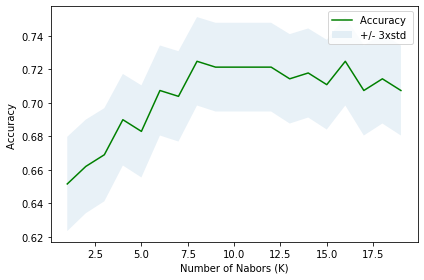

In [75]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [76]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7247386759581882 with k= 8


In [215]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance').fit(X, y)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')

In [216]:
c = pd.read_csv('c3_full.csv')

In [217]:
c.head()

,city,country,geonameid,latitude,longitude,country code,population,hasMug,hasShop
0,'Ain Benian,Algeria,2508275,36.80277,2.92185,DZ,31102,False,False
1,'Ain Deheb,Algeria,2508225,34.84218,1.54697,DZ,36146,False,False
2,'Ain Merane,Algeria,2508010,36.16277,0.97037,DZ,34413,False,False
3,'Ain el Bell,Algeria,2508184,34.34381,3.22475,DZ,31916,False,False
4,'Ain el Melh,Algeria,2508130,34.84146,4.16383,DZ,39798,False,False


In [140]:
!pip install xlrd
sc = pd.read_excel('sb_countries.xlsx')

In [141]:
sc.head()

,country,region
0,Argentina,Americas
1,Aruba,Americas
2,Bahamas,Americas
3,Bolivia,Americas
4,Brazil,Americas


In [142]:
countries = sc.country.values

In [143]:
len(countries)

81

In [144]:
'Russia' in countries

True

In [150]:
c.loc[c.country.isin(countries)].shape

(10627, 9)

In [151]:
c = c[c.country.isin(countries)]

In [152]:
c.shape

(10627, 9)

In [153]:
cp = c.loc[c.hasShop == True].loc[c.hasMug == False]

In [154]:
cp.shape

(3875, 9)

In [155]:
cp.sort_values('population', ascending = False).head()

,city,country,geonameid,latitude,longitude,country code,population,hasMug,hasShop
3066,Delhi,India,1273294,28.65195,77.23149,IN,10927986,False,True
1339,Bengaluru,India,1277333,12.97194,77.59369,IN,5104047,False,True
6009,Kolkata,India,1275004,22.56263,88.36304,IN,4631392,False,True
2415,Chennai,India,1264527,13.08784,80.27847,IN,4328063,False,True
337,Alexandria,Egypt,361058,31.21564,29.95527,EG,3811516,False,True


In [156]:
# drop Delhi
cp = cp[cp.city != 'Delhi']

In [168]:
cc = cp.sort_values('population', ascending = False).groupby('country').first().reset_index()
cc.drop(columns=['geonameid', 'country code', 'hasMug', 'hasShop'], inplace = True)

In [171]:
cc['year'] = 2019
cc.shape

(73, 6)

In [173]:
cc.head()

,country,city,latitude,longitude,population,year
0,Argentina,San Miguel de Tucuman,-26.82414,-65.22260,781023,2019
1,Australia,Wollongong,-34.42400,150.89345,292190,2019
2,Austria,Graz,47.06667,15.45000,222326,2019
3,Bahamas,Nassau,25.05823,-77.34306,227940,2019
4,Bahrain,Manama,26.22787,50.58565,147074,2019


In [175]:
cc_knn = cc[['latitude','longitude','year']].values
cc_knn[0:5]

array([[ -26.82414,  -65.2226 , 2019.     ],
       [ -34.424  ,  150.89345, 2019.     ],
       [  47.06667,   15.45   , 2019.     ],
       [  25.05823,  -77.34306, 2019.     ],
       [  26.22787,   50.58565, 2019.     ]])

In [180]:
cc_knn = preprocessing.StandardScaler().fit(cc_knn).transform(cc_knn.astype(float))
cc_knn[0:5]

array([[ 0.93609526,  0.04465743, -1.75854715],
       [ 1.21511275,  0.09033083, -0.29104017],
       [ 1.26696772, -0.04577786,  0.58946402],
       [-0.45443941,  0.57067912, -1.17154436],
       [-0.82465702, -1.12747478,  0.88296542]])

In [218]:
cc_pred = neigh.predict(cc_knn)

In [219]:
cc_pred[0:20]

array([0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 4, 2, 0, 0, 0, 5])

In [220]:
unique, counts = np.unique(cc_pred, return_counts=True)
counts

array([450, 397, 278,   7,  83, 170,  34,  12])

In [221]:
series

array(['icon', 'yah', 'bts', 'bto', 'yaho', 'rlf', 'yahx', 'btx', 'yahox'],
      dtype=object)

In [222]:
for index,row in cc.iterrows():
    predictes_series_num = cc_pred[index]
    cc.at[index,'series'] = series[predictes_series_num]

In [223]:
cc

,country,city,latitude,longitude,population,year,series
0,Argentina,San Miguel de Tucuman,-26.82414,-65.22260,781023,2019,icon
1,Australia,Wollongong,-34.42400,150.89345,292190,2019,icon
2,Austria,Graz,47.06667,15.45000,222326,2019,yah
3,Bahamas,Nassau,25.05823,-77.34306,227940,2019,icon
4,Bahrain,Manama,26.22787,50.58565,147074,2019,bts
...,...,...,...,...,...,...,...
68,United Arab Emirates,Al Ain,24.19167,55.76056,408733,2019,yahx
69,United Kingdom,Nottingham,52.95360,-1.15047,729977,2019,icon
70,United States,Brooklyn,40.65010,-73.94958,2300664,2019,yah
71,Uruguay,Montevideo,-34.90328,-56.18816,1270737,2019,yaho


In [197]:
mf[mf.country=='Bahamas']

,id,city,country,month,name,series,state,year,date,cun,location_type,location_path,latitude,longitude
81,bahamas_bts,NaN,Bahamas,December,Bahamas,bts,NaN,2018,2018-12-01,NaN,country,Bahamas,24.773655,-78.000055
82,bahamas_icon,NaN,Bahamas,January,Bahamas,icon,NaN,2011,2011-01-01,NaN,country,Bahamas,24.773655,-78.000055


1431

In [207]:
len(y)

1431